In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np
%matplotlib inline
import re 
import math
import time
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [0]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.metrics.pairwise import cosine_similarity
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from gensim.models import KeyedVectors




In [0]:
RANDOM_SEED = 123
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [0]:
DEVICE

device(type='cuda', index=0)

In [0]:
import os
import pandas as pd

# read the text file and add the column names
# read_file = pd.read_csv(r"./booksummaries.txt", sep='	', header=None)  Colab Notebooks/
read_file = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/Project/booksummaries.txt", sep='	', header=None)
read_file.columns = ['ID', 'm number', 'book name', 'author name', 'date', 'label', 'summary']

# clean data
read_file['label'] = read_file['label'].str.replace(r'/m/\S*\s', '')
read_file['label'] = read_file['label'].str.replace(r'{', '')
read_file['label'] = read_file['label'].str.replace(r'}', '')
read_file['label'] = read_file['label'].str.replace(r'novel', 'fiction', case = False)
read_file['label'] = read_file['label'].str.replace(r'\\u00e0\s+clef', '')

# select columns
new_file = read_file.loc[:, ['book name', 'label', 'summary']]

#delete the columns with no labels
new_file.dropna(axis = 0, how = 'any', inplace = True)
new_file = new_file.iloc[:, [0, 2, 1]]

new_file = new_file.reset_index(drop=True)

#output data as csv
#new_file.to_csv(r'/content/drive/My Drive/Colab Notebooks/final project/booksummries.csv', index=False)


In [0]:
new_file.head(7)

,book name,summary,label
0,Animal Farm,"Old Major, the old boar on the Manor Farm, ca...","""""Roman "", """"Satire"", """"Children's literature""..."
1,A Clockwork Orange,"Alex, a teenager living in near-future Englan...","""""Science Fiction"", """"fictionla"", """"Speculativ..."
2,The Plague,The text of The Plague is divided into five p...,"""""Existentialism"", """"Fiction"", """"Absurdist fic..."
3,A Fire Upon the Deep,The novel posits that space around the Milky ...,"""""Hard science fiction"", """"Science Fiction"", ""..."
4,All Quiet on the Western Front,"The book tells the story of Paul Bäumer, a Ge...","""""War fiction"", """"Roman """
5,A Wizard of Earthsea,"Ged is a young boy on Gont, one of the larger...","""""Children's literature"", """"Fantasy"", """"Specul..."
6,Blade Runner 3: Replicant Night,"Living on Mars, Deckard is acting as a consul...","""""Science Fiction"", """"Speculative fiction"""


In [0]:
def cosine_similarity(a, b):
    return a.dot(b)/np.sqrt(a.dot(a) * b.dot(b))

In [0]:
# def calculation(label_list):
#     for i in range(len(label_list)):
#         j = i+1
#         if (j < len(label_list)):
#             for j in range(len(label_list)):
#                 a = nlp(label_list[i]).vector
#                 b = nlp(label_list[j]).vector
#                 if cosine_similarity(a, b)>0.6:
#                         if(len(label_list[i])>len(label_list[j])):
#                             label_list[i] = label_list[j]
#                         else:
#                             label_list[j] = label_list[i]
#     return set(label_list)

In [0]:

import spacy
# Need to load the large model to get the vectors
import en_core_web_sm
nlp = en_core_web_sm.load()
new_file.at[0, 'label']

'""Roman ", ""Satire", ""Children\'s literature", ""Speculative fiction", ""Fiction"'

In [0]:
import re
for index in range(len(new_file['label'])):
    label = new_file['label'][index].replace('"', ''). lower()#  #replace('"', ''). lower() .at[index, 'label']
    label_list = re.split(', ', label) 
    # tokens = word_tokenize(label)
    # words = [word.lower() for word in tokens if word.isalpha()] 
    # label_list = text_process(label_list)
    # label_list = calculation(label_list)
    new_file.xs(index)['label']= label_list
new_file.head()

,book name,summary,label
0,Animal Farm,"Old Major, the old boar on the Manor Farm, ca...","[roman , satire, children's literature, specul..."
1,A Clockwork Orange,"Alex, a teenager living in near-future Englan...","[science fiction, fictionla, speculative ficti..."
2,The Plague,The text of The Plague is divided into five p...,"[existentialism, fiction, absurdist fiction, f..."
3,A Fire Upon the Deep,The novel posits that space around the Milky ...,"[hard science fiction, science fiction, specul..."
4,All Quiet on the Western Front,"The book tells the story of Paul Bäumer, a Ge...","[war fiction, roman ]"


In [0]:
#output data as csv
new_file.to_csv(r'./booksummries.csv', index=False)


In [0]:

categories = list(new_file['label'].values)
all_labels = [word for labels in categories for word in labels]
counts = Counter(all_labels)
# for i in categories:
#     counts.append((i, new_file['label'][i].sum()))
df_stats = pd.DataFrame(counts.items(), columns=['labels', '#books'])
df_stats = df_stats.sort_values(by = '#books', ascending = False)


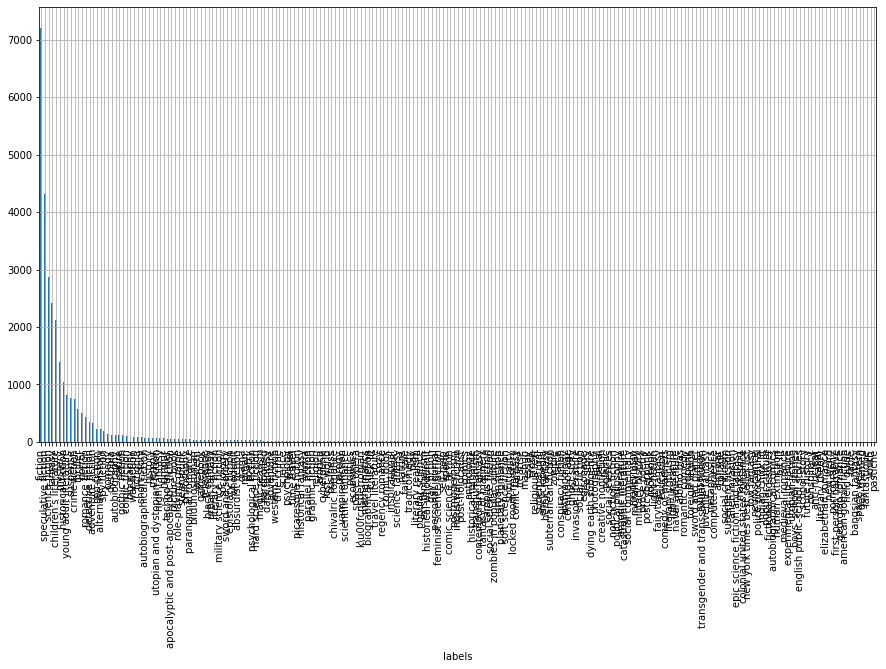

In [0]:
df_stats.plot(x='labels', y='#books', kind='bar', legend=False, grid=True, figsize=(15, 8))

In [0]:
freq_threshold = 50
freq_label = (df_stats.loc[df_stats['#books'] > freq_threshold])['labels'].values.tolist()
nonfreq_label = (df_stats.loc[df_stats['#books'] <= freq_threshold])['labels'].values.tolist()
df_similarity = pd.DataFrame(columns=nonfreq_label, index=freq_label)
for i in freq_label:
  for j in nonfreq_label:
    # if (i in google_vecs.vocab) and (j in google_vecs.vocab):
    a = nlp(i).vector
    b = nlp(j).vector
    # print(cosine_similarity(a, b).shape)
    df_similarity.at[i, j] = cosine_similarity(a, b).item(0)
    # else:
    #   df_similarity.at[i, j] = -1.0
df_similarity.head()
# df_stats.reset_index(drop=True)

,picture book,role-playing game,steampunk,philosophy,paranormal romance,bildungsroman,western,gamebook,reference,black comedy,urban fantasy,literary fiction,military science fiction,sociology,sword and sorcery,epistolary fiction,whodunit,absurdist fiction,drama,roman,poetry,psychological fiction,hard science fiction,magic realism,hardboiled,dark fantasy,adventure,western fiction,true crime,science,psychology,travel,time travel,picaresque fiction,historical fantasy,wuxia,parallel fiction,graphic fiction,religion,erotica,...,superhero fiction,alien invasion,epic science fiction and fantasy,marketing,colonial united states romance,new york times best seller list,low fantasy,neuroscience,police procedural,indian chick lit,popular culture,fictional crossover,autobiographical comics,human extinction,bit lit,medieval romance,experimental literature,utopian fiction,boys' school stories,english public-school stories,school story,future history,conspiracy,anti-nuclear,cabal,literary theory,elizabethan romance,new weird,pornography,first-person narrative,georgian romance,american gothic fiction,field guide,fable,bangsian fantasy,space western,gay themed,fantastique,youth,pastiche
fiction,0.624406,0.345569,0.590055,0.742902,0.505531,0.582672,0.489525,0.562337,0.752832,0.588146,0.619756,0.723418,0.712244,0.665443,0.491416,0.765358,0.533389,0.756065,0.610463,0.575189,0.787945,0.711281,0.663578,0.658799,0.276399,0.614703,0.705847,0.698617,0.610017,0.709407,0.733699,0.719085,0.702443,0.836678,0.63105,0.629211,0.738992,0.730524,0.79408,0.641679,...,0.738651,0.682596,0.673353,0.607632,0.571768,0.577976,0.616865,0.536144,0.674169,0.556648,0.66459,0.615597,0.45321,0.596381,0.522523,0.541735,0.549334,0.679972,0.36911,0.399196,0.633524,0.678303,0.656533,0.248278,0.554392,0.619685,0.514893,0.355553,0.656975,0.382296,0.541976,0.565302,0.560116,0.43436,0.659072,0.544229,0.434294,0.459847,0.617931,0.630133
speculative fiction,0.660841,0.361924,0.54779,0.516824,0.560507,0.473835,0.466037,0.512913,0.56434,0.689735,0.732946,0.795365,0.733245,0.479629,0.433788,0.84861,0.457254,0.736145,0.498358,0.510908,0.550214,0.788607,0.725592,0.766085,0.274248,0.729344,0.483164,0.784553,0.744761,0.536929,0.370536,0.507069,0.632942,0.803044,0.671764,0.548646,0.855399,0.773453,0.538313,0.566246,...,0.751698,0.755605,0.57374,0.485295,0.60651,0.669177,0.711973,0.429169,0.531127,0.614328,0.721521,0.650407,0.546347,0.656261,0.467,0.698065,0.659131,0.821133,0.404815,0.612398,0.681817,0.663847,0.560694,0.495884,0.519815,0.690545,0.580201,0.496514,0.401464,0.505861,0.633334,0.726189,0.586731,0.426111,0.722723,0.660878,0.567235,0.388898,0.437927,0.5303
science fiction,0.720671,0.526353,0.456521,0.633072,0.649821,0.538554,0.397693,0.519062,0.689934,0.692092,0.597349,0.73834,0.884881,0.651063,0.531139,0.755112,0.4638,0.893836,0.646555,0.440846,0.718308,0.705913,0.858234,0.746954,0.211859,0.650688,0.641713,0.729387,0.666511,0.833424,0.593093,0.556082,0.803517,0.819278,0.598928,0.549309,0.730952,0.745294,0.722766,0.518659,...,0.76025,0.753846,0.788734,0.560814,0.657785,0.603135,0.668669,0.526692,0.551952,0.579795,0.693661,0.580232,0.43827,0.69043,0.529248,0.687476,0.620294,0.704774,0.461143,0.541054,0.763405,0.673822,0.659944,0.321565,0.463089,0.682478,0.729959,0.381718,0.536162,0.459006,0.700026,0.643058,0.643981,0.238026,0.692709,0.631875,0.487301,0.247727,0.540307,0.496152
fantasy,0.538795,0.242141,0.668145,0.711291,0.331032,0.535749,0.582337,0.555273,0.745461,0.515571,0.754548,0.56939,0.471874,0.613867,0.499335,0.58794,0.439666,0.532517,0.629439,0.502914,0.649598,0.502347,0.505193,0.54994,0.236255,0.746811,0.624321,0.506136,0.567697,0.623656,0.617442,0.721888,0.664527,0.621863,0.747038,0.638503,0.579444,0.498692,0.661906,0.676707,...,0.480549,0.601751,0.538094,0.636237,0.429521,0.48498,0.716724,0.582182,0.619918,0.395793,0.665876,0.496079,0.429567,0.466268,0.363339,0.39559,0.530832,0.477907,0.370643,0.341628,0.530951,0.632282,0.578827,0.266023,0.637845,0.561426,0.496683,0.415855

In [0]:
len(freq_label)
# len(nonfreq_label)

36

In [0]:
import copy
df_similar_word = pd.DataFrame(df_similarity.astype('float32').idxmax() )
strings = 'anthology'
for index in range(new_file.shape[0]):
  list_tempt = copy.deepcopy(new_file.at[index, 'label'])
  for label in list_tempt:
    if index == 8605:
      print(label)
      print(label == strings)
      if label in nonfreq_label:
        print("in non fre" )
    if label == strings:#new_file.at[8605, 'label'][0]:#strings.strip():
        print(list_tempt)
        print(index)
    if label in nonfreq_label: #  ) and (label == 'anthology')
      if index == 8605:
        print(list_tempt)
      new_file.at[index, 'label'].remove(label)
      if index == 8605:
        print(list_tempt)
      new_file.at[index, 'label'].append(df_similar_word.at[label, 0])
      
      # print(list_tempt)
  new_file.at[index, 'label'] = list(set( new_file.at[index, 'label']))


['anthology']
2761
['alternate history', 'science fiction', 'anthology', 'speculative fiction', 'fiction']
4699
sports
False
in non fre
['sports', 'anthology']
['sports', 'anthology']
anthology
True
in non fre
['sports', 'anthology']
8605
['sports', 'anthology']
['sports', 'anthology']
['anthology', 'essay']
9818
['anthology', 'non-fiction']
10789
['anthology']
11679


In [0]:
# print(new_file.at[8605, 'label'])#.index('anthology')
# if strings in new_file.at[8605, 'label']:
#   print(1)
# if new_file.at[8605, 'label'][0] in nonfreq_label:
#   print(1)
# for strings in list_tempt:
#     if strings in nonfreq_label:
#       new_file.at[8605, 'label'].remove(strings)
# new_file.at[8605, 'label']

set()

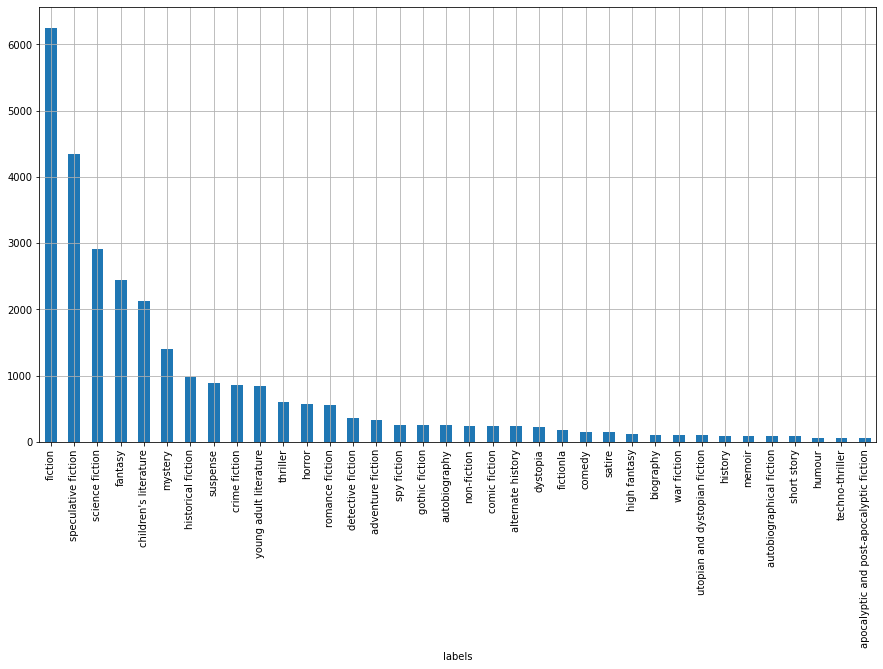

In [0]:
categories1 = new_file['label'].tolist()
all_labels1 = [word for labels in categories1 for word in labels]
counts1 = Counter(all_labels1)
df_stats1 = pd.DataFrame(counts1.items(), columns=['labels', '#books'])
df_stats1 = df_stats1.sort_values(by = '#books', ascending = False)
df_stats1.plot(x='labels', y='#books', kind='bar', legend=False, grid=True, figsize=(15, 8))
df_stats1.shape
set(all_labels1) - set(freq_label)
# for i in range(len(categories1)):
#   x = 'anthology'
#   if x in categories1[i]:
#     print(i)
# list333 = []
# for i in range(len(categories1)):
#   a = 'anthology'
#   for x in categories1[i]:
#     if a in categories1[i]:
#       print(i)
#     list333.append(x)
     
# list333.index('anthology')

In [0]:
df_stats1.shape

(36, 2)

In [0]:
# list_tempt = ['magic','fairy']
# for label in list_tempt:
#   if label in nonfreq_label:
#     list_tempt.remove(label)
#     list_tempt.append(df_similar_word.at[label, 0])
   
# list(set(list_tempt))    
    

In [0]:
from sklearn.utils import shuffle
new_file = shuffle(new_file)
new_file.head().reset_index(drop=True)

,book name,summary,label
0,Parasite Eve,"Mitochondria are the ""energy factories"" of bi...","[science fiction, horror]"
1,Emperor,A mysterious prophecy from the future shapes ...,"[science fiction, alternate history, speculati..."
2,Step by Wicked Step,"Five children, Claudia, Colin, Pixie, Ralph a...",[fiction]
3,A Meeting at Corvallis,Mike (Lord Bear) and Signe Havel of the Beark...,"[science fiction, alternate history, speculati..."
4,Enchanted Glass,Enchanted Glass is set in the imaginary town ...,"[fantasy, fiction, children's literature]"


  ## Encoding the Labels##




In [0]:
label_list = []
for index in range(len(new_file['label'])):
    object_label = new_file['label'][index]
    for l in object_label:
        if l not in label_list:
            label_list.append(l)

# one_hot = pd.DataFrame(new_file['label'])
# one_hot.head()

In [0]:
len(label_list)
df_stats.shape[0]

225

In [0]:
one_hot = pd.DataFrame(np.zeros((12841, df_stats1.shape[0])), columns=label_list).astype(int)

In [0]:
for index in range(len(new_file['label'])):
    object_label = new_file['label'][index]
    for l in object_label:
        one_hot[l][index] = 1

one_hot

,fiction,children's literature,satire,speculative fiction,fictionla,science fiction,utopian and dystopian fiction,romance fiction,fantasy,war fiction,dystopia,historical fiction,gothic fiction,mystery,horror,crime fiction,comic fiction,suspense,autobiography,detective fiction,humour,adventure fiction,non-fiction,history,high fantasy,spy fiction,memoir,short story,techno-thriller,thriller,young adult literature,comedy,alternate history,apocalyptic and post-apocalyptic fiction,autobiographical fiction,biography
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12836,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12837,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
12838,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
12839,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
selected_labels = ["fiction", "fantasy", "children's literature", "mystery"]
new_one_hot = one_hot[selected_labels]
one_hot = new_one_hot
###i= 0
##for r in new_one_hot.iterrows():
#  count = 0
#  for x in range(len(r[1])):
#    if r[1][x] == 0 :
#      count = count + 1
#  if count is 8:
#    new_one_hot.drop(new_one_hot.index[r[0]], axis=0)
  
#print(num)

In [0]:
one_hot

,fiction,fantasy,children's literature,mystery
0,1,0,1,0
1,1,0,0,0
2,1,0,0,0
3,1,1,0,0
4,0,0,0,0
...,...,...,...,...
12836,0,0,0,0
12837,1,0,0,0
12838,1,0,0,0
12839,0,0,0,0


## Split the words##

In [0]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:



#def words_process(new_file):
book_summaries = new_file['summary']
summary_list = [summary for summary in book_summaries]
summary_num = len(summary_list)
#summaries = ''.join(summary_list)
print("the total number of books: {}\n".format(summary_num))

all_docs = []
i_index = 0
for doc in summary_list:
    # Tokenize the string into words
    tokens = word_tokenize(doc)
    # Remove non-alphabetic tokens, such as punctuation
    words = [word.lower() for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]
    if len(words) >= 9:
      all_docs.append(words)
    else:
      print(i_index)
      one_hot = one_hot.drop(i_index, axis=0)
      print(one_hot.shape)
    i_index += 1
    #return all_docs, one_hot_delt

one_hot = one_hot.reset_index(drop=True)

the total number of books: 12841

113
(12840, 4)
260
(12839, 4)
726
(12838, 4)
1002
(12837, 4)
1166
(12836, 4)
1239
(12835, 4)
1242
(12834, 4)
1255
(12833, 4)
1597
(12832, 4)
1686
(12831, 4)
1715
(12830, 4)
1835
(12829, 4)
1968
(12828, 4)
2002
(12827, 4)
2093
(12826, 4)
2263
(12825, 4)
2277
(12824, 4)
2307
(12823, 4)
2435
(12822, 4)
2484
(12821, 4)
2509
(12820, 4)
2518
(12819, 4)
2568
(12818, 4)
2587
(12817, 4)
2764
(12816, 4)
2767
(12815, 4)
2863
(12814, 4)
3100
(12813, 4)
3294
(12812, 4)
3296
(12811, 4)
3380
(12810, 4)
3491
(12809, 4)
3511
(12808, 4)
3680
(12807, 4)
3782
(12806, 4)
3895
(12805, 4)
3932
(12804, 4)
4020
(12803, 4)
4131
(12802, 4)
4184
(12801, 4)
4208
(12800, 4)
4341
(12799, 4)
4363
(12798, 4)
4644
(12797, 4)
4774
(12796, 4)
4916
(12795, 4)
5178
(12794, 4)
5297
(12793, 4)
5374
(12792, 4)
5494
(12791, 4)
5559
(12790, 4)
5827
(12789, 4)
6050
(12788, 4)
6072
(12787, 4)
6121
(12786, 4)
6434
(12785, 4)
6496
(12784, 4)
6568
(12783, 4)
6730
(12782, 4)
6794
(12781, 4)
6911
(127

In [0]:
all_docs = all_docs[: len(all_docs)-1]

len(all_docs)
one_hot = one_hot.drop(len(all_docs)-1)
one_hot.shape

(12735, 4)

In [0]:
l1 = []
for i in range(len(all_docs)):
  l1.append(len(all_docs[i]))
#print(l1.index(6))
len_counts = Counter(l1)
df_len = pd.DataFrame(len_counts.items(), columns=['len', '#books'])
df_len = df_len.sort_values(by = 'len', ascending = True)
#print(min(l1))
df_len.head(17)

#one_hot = one_hot.reset_index(drop=True)

,len,#books
323,9,18
193,10,31
280,11,31
114,12,31
258,13,32
319,14,33
61,15,35
142,16,27
571,17,34
99,18,27


## outliners ##

## Using a Pre-Trained Embedding Layer

In [0]:
# import multiprocessing
# import sys
# import gensim
# from gensim.models import Word2Vec
# assert gensim.models.doc2vec.FAST_VERSION > -1, "This will be painfully slow otherwise."
# #from UtilWordEmbedding import TfidfEmbeddingVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# workers = multiprocessing.cpu_count()
# print('number of cpu: {}'.format(workers))

# word_model = Word2Vec(all_docs,
#                       min_count=1,
#                       size=300,
#                       window=5,
#                       workers=workers,
#                       iter=100)

In [0]:

# def words_embedding(docs):
   
all_words = [ word for doc in all_docs for word in doc]
all_words_nodup = list(dict.fromkeys(all_words))
# Load word2vec model (trained on an enormous Google corpus)
# google_vecs = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary = True) /Colab Notebooks
google_vecs = KeyedVectors.load_word2vec_format('/content/drive/My Drive/Colab Notebooks/Project/CNN_Text_Classification/word2vec_model/word2vec-slim/GoogleNews-vectors-negative300.bin', binary = True)
embedding_dim_dim = google_vecs.vector_size

def words_embedding(doc):
    # Filter the list of vectors to include only those that Word2Vec has a vector for
    vector_list = [google_vecs[word] for word in doc if word in google_vecs.vocab]
    #vector_list = [word_model.wv[word] for word in doc]
    #google_vectors = np.asarray(vector_list)
    # Create a list of the words corresponding to these vectors
    words_filtered = [word for word in doc if word in google_vecs.vocab]
    #Zip the words together with their vector representations
    word_vec_zip = zip(words_filtered, vector_list)

    # Cast to a dict so we can turn it into a DataFrame
    word_vec_dict = dict(word_vec_zip)
    word_vec = pd.DataFrame.from_dict(word_vec_dict, orient='index')
    return word_vec

word_vec  = words_embedding(all_words_nodup)
word_vec_array = np.array(word_vec)
word_vec.shape

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(51222, 300)

In [0]:

len(all_words)
#word_vec_array.shape
word_vec_array

array([[ 0.01373291,  0.19335938,  0.0559082 , ..., -0.22460938,
         0.41601562,  0.296875  ],
       [-0.10351562,  0.16113281,  0.1171875 , ...,  0.04589844,
         0.15332031,  0.24023438],
       [ 0.2734375 , -0.07421875,  0.58203125, ..., -0.04467773,
         0.03491211, -0.06835938],
       ...,
       [ 0.18066406,  0.00982666, -0.11035156, ...,  0.08740234,
         0.10644531, -0.04907227],
       [ 0.01867676, -0.18945312, -0.04785156, ..., -0.2578125 ,
        -0.33203125,  0.48046875],
       [ 0.12255859,  0.05859375,  0.06542969, ..., -0.27539062,
         0.04125977,  0.2890625 ]])

In [0]:
word_vec_array = np.insert(word_vec_array, 0, np.zeros(word_vec_array.shape[1]), 0)


In [0]:
word_vec.tail()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
carting,0.037842,0.515625,-0.322266,0.024658,0.029663,0.119629,-0.213867,0.060059,-0.135742,0.330078,0.184570,-0.250000,0.189453,0.333984,-0.369141,0.306641,0.017334,0.134766,-0.114258,0.110352,0.007996,-0.071289,-0.105469,0.085449,0.175781,-0.146484,-0.193359,0.166992,0.093262,-0.177734,0.114746,-0.135742,0.054443,0.371094,0.017090,-0.218750,-0.096191,-0.181641,-0.044189,-0.057129,...,0.140625,-0.237305,0.065918,0.133789,0.017212,-0.167969,0.141602,0.112793,0.179688,0.359375,-0.108398,0.020630,0.425781,0.208008,0.061768,-0.128906,0.030762,-0.007111,-0.019043,0.133789,-0.308594,0.085938,0.306641,-0.031128,-0.026855,0.111328,-0.179688,0.112793,0.209961,0.117188,-0.240234,-0.058838,-0.091309,-0.005432,0.006683,0.002625,-0.125000,-0.105469,-0.074219,0.031494
humping,0.287109,0.088867,-0.241211,0.104492,0.109375,-0.098633,-0.038574,-0.029907,-0.089355,0.170898,-0.071289,-0.083496,-0.038574,0.089355,-0.045898,-0.028442,-0.194336,-0.200195,-0.198242,-0.151367,0.149414,0.015076,-0.083496,0.255859,0.004578,0.104980,-0.345703,0.215820,0.208008,0.094727,0.197266,-0.008423,0.057373,0.045410,0.055420,-0.168945,0.196289,-0.199219,0.363281,-0.055176,...,-0.143555,0.196289,0.195312,0.076660,-0.119629,-0.096680,-0.035400,-0.028809,-0.001457,0.375000,-0.417969,0.390625,0.396484,-0.038330,0.050781,-0.476562,-0.457031,0.378906,-0.363281,-0.028198,0.192383,0.004974,0.349609,-0.076660,0.032715,-0.078125,-0.267578,-0.332031,0.087891,-0.330078,-0.123047,0.071777,-0.199219,0.064453,-0.247070,-0.109863,0.127930,0.136719,-0.294922,0.333984
tolar,0.180664,0.009827,-0.110352,0.239258,-0.237305,-0.046631,0.139648,-0.183594,0.318359,0.046143,-0.118652,-0.343750,-0.036133,-0.018188,-0.011719,0.203125,0.199219,0.052734,-0.062012,-0.025635,0.119629,0.106445,0.162109,0.040039,-0.057373,-0.080078,-0.154297,0.040771,0.028076,0.043457,-0.250000,-0.337891,0.199219,0.102539,-0.088379,-0.141602,0.202148,-0.024170,0.081543,0.003159,...,0.386719,0.147461,0.125977,0.068359,0.069824,0.025757,-0.041016,-0.066895,-0.067383,0.118164,0.118164,-0.191406,-0.093262,0.110352,0.078125,-0.166016,0.219727,-0.083984,-0.028198,-0.042236,-0.121094,0.277344,0.136719,0.106934,0.139648,-0.224609,-0.161133,0.048584,-0.004181,0.246094,-0.207031,0.250000,-0.038086,0.001328,0.128906,0.166016,-0.042236,0.087402,0.106445,-0.049072
takedown,0.018677,-0.189453,-0.047852,0.209961,0.198242,-0.033447,0.176758,0.010498,0.245117,-0.730469,0.029053,-0.202148,-0.101074,0.582031,-0.122070,-0.445312,0.072754,0.298828,0.091309,-0.578125,0.132812,0.462891,0.597656,0.369141,-0.137695,-0.632812,0.421875,0.135742,-0.099609,-0.116699,-0.143555,0.316406,0.451172,-0.214844,-0.032471,-0.203125,-0.192383,-0.111816,0.062012,0.067871,...,-0.063477,0.209961,-0.053467,-0.304688,-0.098145,0.337891,0.088867,0.138672,-0.474609,0.195312,-0.114746,0.148438,-0.109863,-0.049316,-0.217773,0.365234,0.009094,-0.202148,0.224609,0.259766,-0.218750,0.110840,0.220703,-0.237305,-0.186523,0.118652,0.279297,-0.025269,0.162109,-0.453125,-0.251953,-0.012207,-0.120605,0.051758,-0.060303,-0.148438,-0.180664,-0.257812,-0.332031,0.480469
indict,0.122559,0.058594,0.065430,-0.257812,0.046143,-0.084961,0.101074,0.081543,0.675781,0.328125,0.111328,0.302734,-0.105469,-0.001038,0.120605,0.285156,0.106934,0.021729,-0.062256,-0.253906,0.169922,-0.075195,0.531250,0.177734,0.433594,-0.250000,-0.145508,-0.241211,-0.115723,-0.042480,0.318359,-0.021118,-0.028076,0.133789,-0.173828,0.055908,0.191406,-0.057861,-0.072754,0.168945,...,-0.021729,-0.090332,-0.292969,-0.090332,0.257812,0.347656,-0.247070,-0.055176,-0.147461,-0.233398,0.542969,0.049805,-0.184570,-0.099121,0.195312,0.133789,-0.414062,-0.165039,-0.043213,-0.328125,-0.143555,-0.156250,0.109375,-0.059326,-0.222656,0.137695,-0.2

In [0]:
word_vec_array

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01373291,  0.19335938,  0.0559082 , ..., -0.22460938,
         0.41601562,  0.296875  ],
       [-0.10351562,  0.16113281,  0.1171875 , ...,  0.04589844,
         0.15332031,  0.24023438],
       ...,
       [ 0.18066406,  0.00982666, -0.11035156, ...,  0.08740234,
         0.10644531, -0.04907227],
       [ 0.01867676, -0.18945312, -0.04785156, ..., -0.2578125 ,
        -0.33203125,  0.48046875],
       [ 0.12255859,  0.05859375,  0.06542969, ..., -0.27539062,
         0.04125977,  0.2890625 ]])

In [0]:
# word_vec.to_csv(r'./wor_vec.csv', index=False)

In [0]:
#word_vec = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/final project/wor_vec.csv", header=None)

# Generate the integer vectors of all summaries

In [0]:
word_index = pd.DataFrame(index = word_vec.index)
wordlen_list = range(1, word_vec.shape[0]+1)
word_index['index'] = wordlen_list


In [0]:
wordlen_list[-1]

51222

In [0]:

def words_index(all_docs):
    all_words_index = []
    for doc in all_docs:
        inds = []
        for word in doc:
            try:
                inds.append(word_index.at[word, 'index'])
            except: 
                continue
            
        all_words_index.append(inds)
    return all_words_index

all_words_index = words_index(all_docs)
all_words_index[-1]

[16778,
 10231,
 17750,
 5345,
 6922,
 9791,
 403,
 267,
 18050,
 995,
 13117,
 6836,
 796,
 936,
 17750,
 3844,
 4060,
 7447,
 2082,
 224,
 10231,
 1994,
 2310,
 224,
 2613,
 6621,
 10686,
 67,
 4565,
 3882,
 254,
 778,
 13804,
 5619,
 2632,
 589,
 778,
 14453,
 264,
 5256,
 10231,
 1786,
 2082,
 5266,
 161,
 3812,
 5690,
 129,
 452,
 371,
 25788,
 11583,
 1208,
 6444,
 2082,
 11882,
 1274,
 18859,
 11882,
 6576,
 3341,
 1102,
 4045,
 23858,
 161,
 38466,
 9223,
 11465,
 2965,
 20941,
 263,
 535,
 1777,
 161,
 1034,
 424,
 1917,
 2560,
 2085,
 2086,
 796,
 9453,
 161,
 3051,
 10231,
 1088,
 300,
 10889,
 51220,
 11882,
 3677,
 1405,
 1501,
 12918,
 4451,
 256,
 10231,
 1034,
 16561,
 678,
 27381,
 1801,
 8552,
 8553,
 1667,
 45643,
 3183,
 707,
 2046,
 11882,
 796,
 13706,
 304,
 127,
 10231,
 6268,
 4563,
 10231,
 649,
 7965,
 9257,
 6235,
 1942,
 1207,
 408,
 1675,
 11882,
 18112,
 1515,
 11882,
 256,
 571,
 23910,
 10231,
 230,
 20988,
 6584,
 418,
 23910,
 264,
 1336,
 11882,
 360

In [0]:
len(all_words_index)

12735

In [0]:
max(all_words_index[-1])

51222

In [0]:
l = []
for i in range(len(all_words_index)):
    l.append(len(all_words_index[i]))
l.index(max(l))
max(l)
#len(all_words_index)

2856

# Visualize the cluster of books

In [0]:
# import numpy as np
# def avg_doc_embedding(all_docs):
#     doc_vec = []
#     for doc in all_docs:
#         if len(doc) != 0:
#             vector =  words_embedding(doc)
#             doc_vec.append(np.mean(np.array(vector), axis=0))
    
#     summary_vec = np.array(doc_vec)
#     return summary_vec

# summary_vec = avg_doc_embedding(all_docs)

In [0]:
# summary_vec.shape

In [0]:
pip install gensim

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
#def tf_dif(doc):
all_text_docs = []
for doc in all_docs:
    print(len(doc))
    all_text_docs.append(" ". join(doc))
tf_idf_vect = TfidfVectorizer(stop_words='english', max_features=6000)
final_tf_idf = tf_idf_vect.fit_transform(all_text_docs)
tfidf_feat = tf_idf_vect.get_feature_names()
    #return final_tf_idf
# final_tf_idf
# tfidf_feat

Streaming output truncated to the last 5000 lines.
46
81
48
92
171
115
203
505
12
869
214
612
26
74
55
84
418
88
221
459
89
632
446
61
96
116
405
227
325
57
240
225
562
91
57
202
121
422
214
341
79
46
31
64
39
47
1370
145
398
138
54
572
349
207
990
379
117
83
22
85
445
161
265
98
356
135
205
155
99
435
230
203
108
187
265
145
122
74
55
233
86
289
442
451
137
158
85
136
155
154
119
344
153
285
42
81
87
781
124
161
323
715
178
225
250
217
69
283
405
83
441
539
299
986
287
34
473
73
9
143
289
13
405
42
35
208
478
95
256
268
65
187
56
86
89
202
69
548
53
446
141
190
22
161
356
574
45
248
117
66
244
261
433
69
52
47
283
98
39
540
20
343
945
415
96
146
197
42
28
427
351
35
514
79
494
141
46
205
62
428
118
1119
853
1089
36
67
84
239
26
288
169
9
176
114
47
42
14
111
177
262
333
524
191
448
930
170
58
162
68
873
30
211
61
125
341
69
300
87
174
357
57
96
346
90
185
126
92
289
348
144
143
253
387
478
142
342
55
363
256
208
172
431
20
437
219
282
58
73
259
686
86
55
215
162
181
42
570
10
472
405


In [0]:
tfidf_doc_vectors_ft = [] # the tfidf-ft for each summary  is stored in this list
row=0
errors=0
for doc in all_docs: # for each summary 
    doc_vec = np.zeros(300) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the summary 
    for word in doc: # for each word in a summary 
        try:
            word_vec = google_vecs[word]
            #word_vec = word_model.wv[word]
            # obtain the tf_idf of a word in a summary 
            tfidf = final_tf_idf[row, tfidf_feat.index(word)]
            #print(tfidf)
            doc_vec += (word_vec * tfidf)
            weight_sum += tfidf
        except:
            errors =+1
            pass
    doc_vec /= weight_sum
   

    tfidf_doc_vectors_ft.append(doc_vec)
    row += 1

tfidf_doc_vectors_ft_array = np.array(tfidf_doc_vectors_ft)
print('errors noted: '+str(errors))

errors noted: 1


In [0]:
tfidf_doc_vectors_ft_array.shape

(12735, 300)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

X = tfidf_doc_vectors_ft_array
y = one_hot.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.25314070351758794
Testing F1 score: 0.3092973397413722


In [0]:
pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-cp36-none-any.whl size=7100 sha256=8d95a40b2032b0812ee9028c0307994101271cef4569375174330c1b266a8c2e
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


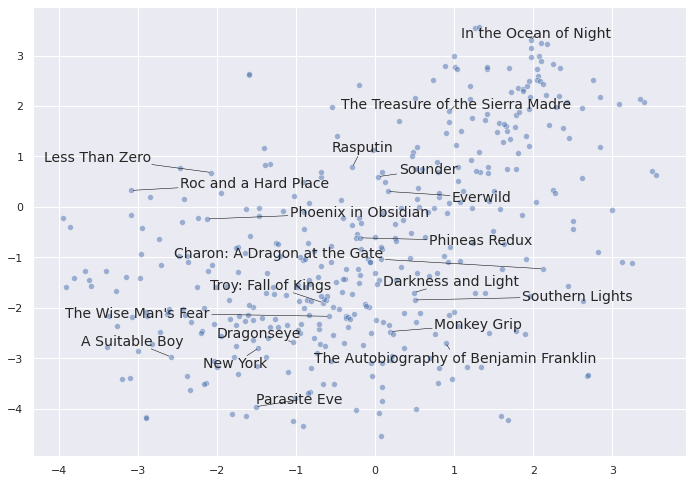

In [0]:
from sklearn.manifold import TSNE
from adjustText import adjust_text
import seaborn as sns
import matplotlib.pyplot as plt
book_titles = new_file['book name']
titles_list = [title for title in book_titles]
titles_list = titles_list[:400]
def t_SNE_plot(df_data):
    # Initialize t-SNE
    tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

    # Use only 400 rows to shorten processing time
    tsne_df = tsne.fit_transform(df_data)#tsne.fit_transform(df_data[:400])

    sns.set()
    # Initialize figure
    fig, ax = plt.subplots(figsize = (11.7, 8.27))
    sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

    # Import adjustText, initialize list of texts

    texts = []
    data_to_plot = list(np.arange(0, 400, 20))#list(np.arange(0, 400, 40))

    # Append words to list
    for data in data_to_plot:
        texts.append(plt.text(tsne_df[data, 0], tsne_df[data, 1], titles_list[data], fontsize = 14))

    # Plot text using adjust_text (because overlapping text is hard to read)
    adjust_text(texts, force_points = 0.4, force_text = 0.4, 
                expand_points = (2,1), expand_text = (1,2),
                arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

    plt.show()

t_SNE_plot(tfidf_doc_vectors_ft_array[:400, :])    

## Padding sequences

In [0]:
max_Length = 0  
docs_length = []
for x in all_words_index:
    docs_length.append(len(x))
    if len(x) > max_Length:
        max_Length = len(x)

docs_length = np.array(docs_length)
max_Length

2856

In [0]:
np.where(docs_length<1)
#docs_length[3382]

(array([], dtype=int64),)

In [0]:
def pad_sequences(all_words_index, seq_length):
    
    # getting the correct rows x cols shape
    sequences = np.zeros((len(all_words_index), seq_length), dtype=int)
 
    # for each review, I grab that review and 
    for i, row in enumerate(all_words_index):
        if len(row)>0:
            sequences[i, 0:len(row)] =  np.array(row)[:seq_length]
    
    return sequences

In [0]:
sequences = pad_sequences(all_words_index, max_Length)

assert len(sequences)==len(all_words_index), "Sequences should have as many rows as reviews."
assert len(sequences[0])==max_Length, "Each sequence row should contain seq_length values."

print(sequences[-1])
np.where(sequences[-1] ==51242 )

[16778 10231 17750 ...     0     0     0]


(array([], dtype=int64),)

# Training, Validation, and Test Data

In [0]:
split_frac = 0.7

## split data into training, validation, and test data (features and labels, x and y)

split_idx = int(len(sequences)*split_frac)
train_x, remaining_x = sequences[:split_idx], sequences[split_idx:]
train_y, remaining_y = one_hot[:split_idx], one_hot[split_idx:]
train_len, remaining_len = docs_length[:split_idx], docs_length[split_idx:]

# train_x, remaining_x = sequences[:3500], sequences[-2000:]
# train_y, remaining_y = one_hot[:3500], one_hot[-2000:]
# train_len, remaining_len = docs_length[:3500], docs_length[-2000:]

test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]
val_len, test_len = remaining_len[:test_idx], remaining_len[test_idx:]

## print out the shapes of your resultant feature data
print("\t\t\tSequences Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))


			Sequences Shapes:
Train set: 		(8914, 2856) 
Validation set: 	(1910, 2856) 
Test set: 		(1911, 2856)


In [0]:
test_len.min

<function ndarray.min>

In [0]:
# split_frac = 0.8

# ## split data into training, validation, and test data (features and labels, x and y)

# split_idx = int(len(all_words_index)*split_frac)
# train_x, remaining_x = all_words_index[:split_idx], all_words_index[split_idx:]
# train_y, remaining_y = one_hot[:split_idx], one_hot[split_idx:]
# #train_len, remaining_len = docs_length[:split_idx], docs_length[split_idx:]

# test_idx = int(len(remaining_x)*0.5)
# val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
# val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]
# #val_len, test_len = remaining_len[:test_idx], remaining_len[test_idx:]

# ## print out the shapes of your resultant feature data
# print("\t\t\tSequences Shapes:")
# print("Train set: \t\t{}".format(len(train_x)), 
#       "\nValidation set: \t{}".format(len(val_x)),
#       "\nTest set: \t\t{}".format(len(test_)))

### Above only 2,0,1 because I only used  3 datasample to do all of these

# DataLoaders and Batching

In [0]:
import torch
from torch.utils.data import TensorDataset, DataLoader, Dataset
# from torch.nn.utils.rnn import pad_sequence
# # create Tensor datasets


train_data = TensorDataset(torch.from_numpy(np.array(train_x)), torch.from_numpy(np.array(train_y)), torch.from_numpy(train_len)) 
valid_data = TensorDataset(torch.from_numpy(np.array(val_x)), torch.from_numpy(np.array(val_y)), torch.from_numpy(val_len))
test_data = TensorDataset(torch.from_numpy(np.array(test_x)), torch.from_numpy(np.array(test_y)), torch.from_numpy(test_len)) 

# # train_data = Dataset(train_x, train_y) #, torch.from_numpy(train_len)
# # valid_data = Dataset(val_x, val_y)
# # test_data = Dataset(test_x, test_y) 

# # dataloaders
batch_size = 128
# #RANDOM_SEED = 1

# def pad_collate(batch):
#   (xx, yy) = zip(*batch)
#   x_lens = [len(x) for x in xx]
#   y_lens = [len(y) for y in yy]

#   xx_pad = pad_sequence(xx, batch_first=True, padding_value=0)
#   yy_pad = pad_sequence(yy, batch_first=True, padding_value=0) , collate_fn=pad_collate

#   return xx_pad, yy_pad, x_lens, y_lens

# shuffling and batching data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, num_workers=4)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, num_workers=4)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size, num_workers=4)

In [0]:
len(train_loader)

70

# LSTM model

In [0]:


# import numpy as np
# from torch import nn
# import torch.nn.functional as F


# # def kmax_pooling(x, dim, k):
# #     index = x.topk(k, dim = dim)[1].sort(dim = dim)[0]
# #     return x.gather(dim, index)

# class LSTMText(torch.nn.Module): 
#     def __init__(self, vocab_size, embedding_dim, hidden_size, num_layers, 
#                 linear_hidden_size, num_classes, freeze_embeddings=True):
#         super(LSTMText, self).__init__()
        
#         self.num_classes = num_classes
#         # 1. embedding layer
#         self.embedding = nn.Embedding(vocab_size, embedding_dim)
#         # set weights to pre-trained
#         self.embedding.weight = nn.Parameter(torch.from_numpy(word_vec_array)) # all vectors
#         # (optional) freeze embedding weights
#         if freeze_embeddings:
#             self.embedding.requires_grad = False

#         self.lstm =nn.LSTM( input_size = embedding_dim,
#                             hidden_size = hidden_size,
#                             num_layers = num_layers,
#                             bias = True,
#                             batch_first = False,
#                             # dropout = 0.5,
#                             bidirectional = True
#                             )

#         # self.dropout = nn.Dropout()
#         self.fc = nn.Sequential(
#             nn.Linear(hidden_size*2, linear_hidden_size),
#             nn.BatchNorm1d(linear_hidden_size),
#             nn.ReLU(inplace=True),
#             nn.Linear(linear_hidden_size, num_classes)
#         )
        
#          #activation function
#         self.act = nn.Sigmoid()
 
#     def forward(self, text):
      
#         #text = [batch size,sent_length]
#         embedded = self.embedding(text)
#         #embedded = [batch size, sent_len, emb dim]
#         print(embedded.shape)
#         #packed sequence
#         #packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths, batch_first=True)
        
#         #packed_output, (hidden, cell) = self.lstm(packed_embedded)
#         packed_output = self.lstm(embedded) #.view(len(text), 1, -1)
#         #hidden = [batch size, num layers * num directions,hid dim]
#         #cell = [batch size, num layers * num directions,hid dim]
        
#         #concat the final forward and backward hidden state
#         #hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1)
                
#         #hidden = [batch size, hid dim * num directions]
#         #logits=self.fc(hidden)
#         logits=self.fc(packed_output) #.view(len(text),-1)

#         #Final activation function
#         probas=self.act(logits, dim = 1)

#         return logits, probas


In [0]:
import numpy as np
from torch import nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
# attention layer code inspired from: https://discuss.pytorch.org/t/self-attention-on-words-and-masking/5671/4
class Attention(nn.Module):
    def __init__(self, hidden_size, batch_first=False):
        super(Attention, self).__init__()

        self.hidden_size = hidden_size
        self.batch_first = batch_first

        self.att_weights = nn.Parameter(torch.Tensor(1, hidden_size), requires_grad=True)

        stdv = 1.0 / np.sqrt(self.hidden_size)
        for weight in self.att_weights:
            nn.init.uniform_(weight, -stdv, stdv)

    def get_mask(self):
        pass

    def forward(self, inputs, lengths):
        if self.batch_first:
            batch_size, max_len = inputs.size()[:2]
        else:
            max_len, batch_size = inputs.size()[:2]
        # print(inputs.size())
        # print(self.att_weights.permute(1, 0).unsqueeze(0).repeat(batch_size, 1, 1).size())    
        # apply attention layer
        weights = torch.bmm(inputs,
                            self.att_weights  # (1, hidden_size)
                            .permute(1, 0)  # (hidden_size, 1)
                            .unsqueeze(0)  # (1, hidden_size, 1)
                            .repeat(batch_size, 1, 1) # (batch_size, hidden_size, 1)
                            )
    
        attentions = torch.softmax(F.tanh(weights.squeeze()), dim=-1)

        # create mask based on the sentence lengths
        mask = torch.ones(attentions.size(), requires_grad=True).cuda()
        for i, l in enumerate(lengths):  # skip the first sentence
            if l < max_len:
                mask[i, l:] = 0

        # apply mask and renormalize attention scores (weights)
        masked = attentions * mask
        _sums = masked.sum(-1).unsqueeze(-1)  # sums per row
        
        attentions = masked.div(_sums)

        # apply attention weights
        weighted = torch.mul(inputs, attentions.unsqueeze(-1).expand_as(inputs))

        # get the final fixed vector representations of the sentences
        representations = weighted.sum(1).squeeze()

        return representations, attentions

In [0]:


import numpy as np
from torch import nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

# def kmax_pooling(x, dim, k):
#     index = x.topk(k, dim = dim)[1].sort(dim = dim)[0]
#     return x.gather(dim, index)

class LSTMText1(torch.nn.Module): 
    def __init__(self, vocab_size, embedding_dim, hidden_size, num_layers, 
                linear_hidden_size, num_classes, freeze_embeddings=True):
        super(LSTMText1, self).__init__()
        
        
#         self.num_classes = num_classes
        # 1. embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        # set weights to pre-trained
        self.embedding.weight = nn.Parameter(torch.from_numpy(word_vec_array)) # all vectors
        # (optional) freeze embedding weights
        if freeze_embeddings:
            self.embedding.requires_grad = False

        self.lstm =nn.LSTM( input_size = embedding_dim,
                            hidden_size = hidden_size,
                            num_layers = num_layers,
                            bias = True,
                            batch_first = True,
                            # dropout = 0.5,
                            bidirectional = True
                            )
        self.atten = Attention(hidden_size*2, batch_first=True) # 2 is bidrectional
        # self.lstm2 = nn.LSTM(input_size=hidden_size*2,
        #                     hidden_size=hidden_size,
        #                     num_layers=1, 
        #                     bidirectional=True)
        # self.dropout = nn.Dropout()
        self.fc = nn.Sequential(
            nn.Linear(hidden_size*2, linear_hidden_size), #linear_hidden_size
            nn.BatchNorm1d(linear_hidden_size),
            nn.ReLU(inplace=True),
            #nn.Dropout(),
            nn.Linear(linear_hidden_size, num_classes)
        )
        
         #activation function
        self.act = nn.Sigmoid()
 
    def forward(self, text, text_lengths):
      
        #text = [batch size,sent_length]
        embedded = self.embedding(text)
        #embedded = [batch size, sent_len, emb dim]
        #print(embedded.shape)
        #packed sequence
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths, batch_first=True, enforce_sorted=False)
        
        packed_output, (hidden, cell) = self.lstm(packed_embedded)
        # print(packed_output.shape)
        # text, text_lengths = nn.utils.rnn.pad_packed_sequence(packed_output, batch_first=True)
        #packed_output = self.lstm(embedded) #.view(len(text), 1, -1)
        #hidden = [batch size, num layers * num directions,hid dim]
        #cell = [batch size, num layers * num directions,hid dim]
        # text, _ = self.atten(text, text_lengths) 
        # print('text: ', text.size())
        # out2, (h_n, c_n) = self.lstm2(packed_output)
        # y, lengths = nn.utils.rnn.pad_packed_sequence(out2, batch_first=True)
        # y, _ = self.atten(y, lengths)
        # print('y: ', y.size())

        #conv_out = kmax_pooling((content_out),2,self.opt.kmax_pooling)
        #concat the final forward and backward hidden state
        #hidden = torch.cat([x, y], dim=1)
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1)
                
        # hidden = [batch size, hid dim * num directions]
        #logits=self.fc(text)
        reshaped = hidden.view( hidden.size(0), -1)
        logits=self.fc(reshaped) #.view(len(text),-1)

        #Final activation function
        probas=self.act(logits)

        return logits, probas


# Instantiate the network

In [0]:
# vocab_size, embedding_dim, hidden_size, num_layers, 
#                  bidirectional, dropout, linear_hidden_size, num_classes
    
# Instantiate the model with hyperparameters
import random
vocab_size = word_vec.shape[0]+1#len(google_vecs.vocab)
#num_classes = 1 # binary class (1 or 0)
embedding_dim = google_vecs.vector_size # 300-dim vectors
hidden_size = 256 #LSTM hidden size
num_layers=2 #LSTM layers
linear_hidden_size = 200 # units number of full connected 
num_classes = one_hot.shape[1]

# random.seed(RANDOM_SEED)
# torch.manual_seed(RANDOM_SEED)  ###revise


# torch.nn.init.xavier_uniform(m.weight.data)

model = LSTMText1(vocab_size, embedding_dim, hidden_size, num_layers, 
                 linear_hidden_size, num_classes)

model = model.float()

print(model)
model = model.to(DEVICE)

#No. of trianable parameters
def count_parameters(model):
    return sum(m.numel() for m in model.parameters() if m.requires_grad)
    
print(f'The model has {count_parameters(model):,} trainable parameters')


LSTMText1(
  (embedding): Embedding(301, 300)
  (lstm): LSTM(300, 256, num_layers=2, batch_first=True, bidirectional=True)
  (atten): Attention()
  (fc): Sequential(
    (0): Linear(in_features=512, out_features=200, bias=True)
    (1): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Linear(in_features=200, out_features=4, bias=True)
  )
  (act): Sigmoid()
)
The model has 18,190,960 trainable parameters


In [0]:
NUM_EPOCHS = 15
intial_lr = 0.01
criterion = nn.BCELoss()       
optimizer = torch.optim.SGD(model.parameters(), lr=intial_lr, weight_decay=4e-4, momentum=0.9) #Adam
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer,
#                                                    gamma=0.1,
#                                                    last_epoch=-1)

#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 10, gamma=0.5, last_epoch=-1)
#scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.01, max_lr=0.1)

In [0]:
  for epoch in range(30):
    if not epoch % 10 and epoch != 0:
      print(epoch)
probas = np.array([[0.25, 0.4, 0.6, 0.9, 0.12], [0.25, 0.4, 0.6, 0.9, 0.12], [0.25, 0.4, 0.6, 0.9, 0.12], [0.25, 0.4, 0.6, 0.9, 0.12]]  ) 
#(probas > 0.4).cpu().numpy().astype(np.uint8)   
target_index = np.argsort(probas[1, :])#[-3:]  
np.argsort(probas[1, :])[-3:]

10
20


array([1, 2, 3])

# Define loss function and evaluation parameters and Train

In [0]:
def compute_accuracy_and_loss(model, data_loader, device):
    correct_pred, num_examples = 0, 0
    loss = 0.
    accuracy_list = []
    f_measure_list = []
    list_prob = []
    for i, (features, targets, features_len) in enumerate(data_loader):
            
        features = features.to(device)
        targets = targets.to(device)
        features_len = features_len.to(device)
        # print('features_len', features_len.shape)
        # print('targets', targets.shape)
        # print('features', features.shape)
        logits, probas = model(features, features_len)
        #list_prob.append(probas.cpu().numpy().tolist())
        loss += criterion(probas, targets.float()).item()
        # targets_arr = targets.cpu().numpy()
        # # print(targets_arr)
        # targets_num = np.count_nonzero(targets_arr, axis=1)
        # # print(targets_num)
        # probas_arr = probas.cpu().numpy() 
        # predicted_labels = np.zeros(probas_arr.shape)
        # for i in range(probas_arr.shape[0]):
        #   target_index = np.argsort(probas_arr[i, :])[-targets_num[i]:]
        #   for j in target_index:
        #     predicted_labels[i, j] = 1
        predicted_labels = (probas > 0.6).cpu().numpy().astype(np.uint8)#(probas > 0.4).cpu().numpy()
        #print(predicted_labels)
        #print(precision_recall_fscore_support(targets.cpu().numpy(), predicted_labels,average='weighted')[:3])
        num_examples += targets.size(0)
        accuracy_list.append(accuracy_score(targets.cpu().numpy(), predicted_labels))
        f_measure_list.append(list(precision_recall_fscore_support(targets.cpu().numpy(), predicted_labels,average='weighted')[:3]))
    average_loss = loss/ num_examples
    # accuracy = accuracy_score(targets.cpu().numpy(), predicted_labels)
    # #ACU = roc_auc_score(targets.cpu().numpy(), predicted_labels)
    # f_measure = precision_recall_fscore_support(targets.cpu().numpy(), predicted_labels,average='weighted')
    accuracy = np.mean(np.array(accuracy_list))
    f_measure = np.mean(np.array(f_measure_list), axis = 0)
    return accuracy, average_loss, f_measure

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
import torch.nn.functional as F


    

start_time = time.time()
train_acc_lst, valid_acc_lst = [], []
train_loss_lst, valid_loss_lst = [], []

for epoch in range(NUM_EPOCHS):
    
    model.train()
    
    for batch_idx, (features, targets, features_len) in enumerate(train_loader): #, 

        ### PREPARE MINIBATCH
        features = features.to(DEVICE)
        targets = targets.to(DEVICE)
        features_len = features_len.to(DEVICE)
#         features, features_lengths = batch.features
#         targets = batch.targets
        #print(features_len)
        #retrieve text and no. of words
        #print(features_len)
            
        ### FORWARD AND BACK PROP
        features = features.view(features.size(0), -1)
        logits, probas = model(features, features_len)
        cost = criterion(probas, targets.float())
        optimizer.zero_grad()
        
        cost.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        # model.apply(weights_init)
        ### LOGGING
        if not batch_idx % 20:
            print (f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} | '
                   f'Batch {batch_idx:03d}/{len(train_loader):03d} |' 
                   f' Cost: {cost:.4f}')
      #  if not epoch % 10 and epoch != 0:
        #    scheduler.step()
        
    # no need to build the computation graph for backprop when computing accuracy
    model.eval()
    with torch.set_grad_enabled(False):
        train_acc, train_loss, train_f_measure = compute_accuracy_and_loss(model, train_loader, device=DEVICE)
        valid_acc, valid_loss, valid_f_measure = compute_accuracy_and_loss(model, valid_loader, device=DEVICE)
        train_acc_lst.append(train_acc)
        valid_acc_lst.append(valid_acc)
        train_loss_lst.append(train_loss)
        valid_loss_lst.append(valid_loss)
        print(f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} Train Acc.: {train_acc:.2f}%'
              f' | Validation Acc.: {valid_acc:.2f}%')

    elapsed = (time.time() - start_time)/60
    print(f'Time elapsed: {elapsed:.2f} min')
    print('the precision_recall_fscore_support of F-score_train: ', train_f_measure)
    print('the precision_recall_fscore_support of F-score_val: ', valid_f_measure)




Epoch: 001/015 | Batch 000/070 | Cost: 0.6633
Epoch: 001/015 | Batch 020/070 | Cost: 0.4766
Epoch: 001/015 | Batch 040/070 | Cost: 0.5454
Epoch: 001/015 | Batch 060/070 | Cost: 0.5522


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 001/015 Train Acc.: 0.28% | Validation Acc.: 0.40%
Time elapsed: 1.76 min
the precision_recall_fscore_support of F-score_train:  [0. 0. 0.]
the precision_recall_fscore_support of F-score_val:  [0. 0. 0.]
Epoch: 002/015 | Batch 000/070 | Cost: 0.4959
Epoch: 002/015 | Batch 020/070 | Cost: 0.4967
Epoch: 002/015 | Batch 040/070 | Cost: 0.4788
Epoch: 002/015 | Batch 060/070 | Cost: 0.5023
Epoch: 002/015 Train Acc.: 0.32% | Validation Acc.: 0.36%
Time elapsed: 3.52 min
the precision_recall_fscore_support of F-score_train:  [0.36421011 0.15825965 0.21880527]
the precision_recall_fscore_support of F-score_val:  [0.17736601 0.11096562 0.13564377]
Epoch: 003/015 | Batch 000/070 | Cost: 0.5048
Epoch: 003/015 | Batch 020/070 | Cost: 0.4777
Epoch: 003/015 | Batch 040/070 | Cost: 0.5209
Epoch: 003/015 | Batch 060/070 | Cost: 0.4924
Epoch: 003/015 Train Acc.: 0.34% | Validation Acc.: 0.36%
Time elapsed: 5.28 min
the precision_recall_fscore_support of F-score_train:  [0.3887392  0.17751679 0.2

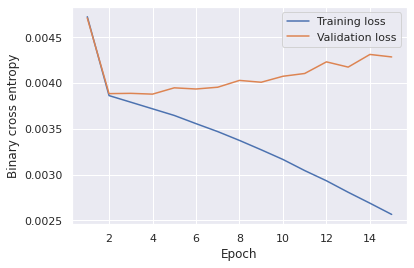

In [0]:
plt.plot(range(1, NUM_EPOCHS+1), train_loss_lst, label='Training loss')
plt.plot(range(1, NUM_EPOCHS+1), valid_loss_lst, label='Validation loss')
plt.legend(loc='upper right')
plt.ylabel('Binary cross entropy')
plt.xlabel('Epoch')
plt.show()

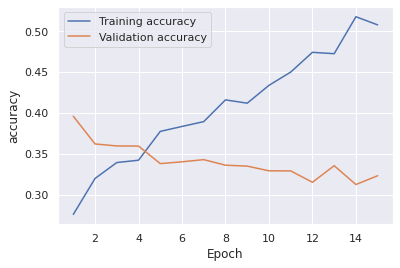

Training accuracy: 0.51%
Validation accuracy: 0.32%


In [0]:
plt.plot(range(1, NUM_EPOCHS+1), train_acc_lst, label='Training accuracy')
plt.plot(range(1, NUM_EPOCHS+1), valid_acc_lst, label='Validation accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.show()
print(f'Training accuracy: {train_acc_lst[-1]:.2f}%')
print(f'Validation accuracy: {valid_acc_lst[-1]:.2f}%')

In [0]:

model.eval()
with torch.set_grad_enabled(False): # save memory during inference
    test_acc, test_loss, test_f_measure = compute_accuracy_and_loss(model, test_loader, DEVICE)
    print(f'Test accuracy: {test_acc:.2f}%')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test accuracy: 0.36%


In [0]:
for i, (features, targets, features_len) in enumerate(test_loader):
            
#         features = features.to(device)
#         targets = targets.to(device)
#         features_len = features_len.to(device)
        print('features_len', features_len.shape)
        print('targets', targets.shape)
        print('features', features.shape)

features_len torch.Size([128])
targets torch.Size([128, 8])
features torch.Size([128, 2856])
features_len torch.Size([128])
targets torch.Size([128, 8])
features torch.Size([128, 2856])
features_len torch.Size([128])
targets torch.Size([128, 8])
features torch.Size([128, 2856])
features_len torch.Size([128])
targets torch.Size([128, 8])
features torch.Size([128, 2856])
features_len torch.Size([128])
targets torch.Size([128, 8])
features torch.Size([128, 2856])
features_len torch.Size([128])
targets torch.Size([128, 8])
features torch.Size([128, 2856])
features_len torch.Size([128])
targets torch.Size([128, 8])
features torch.Size([128, 2856])
features_len torch.Size([128])
targets torch.Size([128, 8])
features torch.Size([128, 2856])
features_len torch.Size([128])
targets torch.Size([128, 8])
features torch.Size([128, 2856])
features_len torch.Size([128])
targets torch.Size([128, 8])
features torch.Size([128, 2856])
features_len torch.Size([128])
targets torch.Size([128, 8])
features t